# Tutorial 4. Classification

# (Example) Churn prediction: Who will leave?

- **GOAL**: predicting whether a customer will change telecommunications provider, something known as "churning".

# 0. Data

- The training dataset contains 4250 samples.
- Each sample contains 9 features and 1 boolean variable "churn" which indicates the class of the sample. 


#### Input features
- "account_length", numerical. Number of months the customer has been with the current telco provider
- "international_plan", (yes/no). The customer has international plan.
- "voice_mail_plan", (yes/no). The customer has voice mail plan.
- "number_vmail_messages", numerical. Number of voice-mail messages.
- "total_charge", numerical. Total charge of calls.
- "total_calls_cnt", numerical. Total number of calls.
- "total_minutes", numerical. Total minutes of calls.
- "total_intl_charge", numerical. Total charge of international calls.
- "number_customer_service_calls", numerical. Number of calls to customer service

#### Output feature
- "churn", (yes/no). Customer churn - target variable

In [1]:
import pandas as pd

df = pd.read_csv('churn_preprocessed.csv')
df

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_charge,total_calls_cnt,total_minutes,total_intl_charge,number_customer_service_calls,churn
0,107,no,yes,26,55.54,329,611.5,3.70,1,no
1,137,no,no,0,59.00,328,527.2,3.29,0,no
2,84,yes,no,0,65.02,248,558.2,1.78,2,no
3,75,yes,no,0,49.36,356,501.9,2.73,3,no
4,121,no,yes,24,76.28,314,779.3,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...
4245,83,no,no,0,62.35,237,645.8,2.78,0,no
4246,73,no,no,0,49.77,260,495.3,3.11,3,no
4247,75,no,no,0,51.24,331,492.9,1.86,1,no
4248,50,no,yes,40,72.42,369,756.2,2.67,2,no


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   international_plan             4250 non-null   object 
 2   voice_mail_plan                4250 non-null   object 
 3   number_vmail_messages          4250 non-null   int64  
 4   total_charge                   4250 non-null   float64
 5   total_calls_cnt                4250 non-null   int64  
 6   total_minutes                  4250 non-null   float64
 7   total_intl_charge              4250 non-null   float64
 8   number_customer_service_calls  4250 non-null   int64  
 9   churn                          4250 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 332.2+ KB


Transform non-numerical values into numerical values

In [3]:
df['churn'] = df['churn'].map({'no': 0, 'yes': 1})
df['international_plan'] = df['international_plan'].map({'no': 0, 'yes': 1})
df['voice_mail_plan'] = df['voice_mail_plan'].map({'no': 0, 'yes': 1})

In [4]:
df

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_charge,total_calls_cnt,total_minutes,total_intl_charge,number_customer_service_calls,churn
0,107,0,1,26,55.54,329,611.5,3.70,1,0
1,137,0,0,0,59.00,328,527.2,3.29,0,0
2,84,1,0,0,65.02,248,558.2,1.78,2,0
3,75,1,0,0,49.36,356,501.9,2.73,3,0
4,121,0,1,24,76.28,314,779.3,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...
4245,83,0,0,0,62.35,237,645.8,2.78,0,0
4246,73,0,0,0,49.77,260,495.3,3.11,3,0
4247,75,0,0,0,51.24,331,492.9,1.86,1,0
4248,50,0,1,40,72.42,369,756.2,2.67,2,0


In [5]:
df.describe()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_charge,total_calls_cnt,total_minutes,total_intl_charge,number_customer_service_calls,churn
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,0.093176,0.261647,7.631765,56.683586,299.923294,580.961388,2.769654,1.559059,0.140706
std,39.698401,0.290714,0.439583,13.439882,10.334156,34.405153,88.823648,0.745204,1.311434,0.347759
min,1.000000,0.000000,0.000000,0.000000,19.980000,188.000000,275.200000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,0.000000,0.000000,49.592500,277.000000,521.125000,2.300000,1.000000,0.000000
50%,100.000000,0.000000,0.000000,0.000000,56.680000,300.000000,581.400000,2.780000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,16.000000,63.447500,323.000000,640.900000,3.240000,2.000000,0.000000
max,243.000000,1.000000,1.000000,52.000000,92.560000,410.000000,876.900000,5.400000,9.000000,1.000000


In [6]:
df.isna().sum()

account_length                   0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_charge                     0
total_calls_cnt                  0
total_minutes                    0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

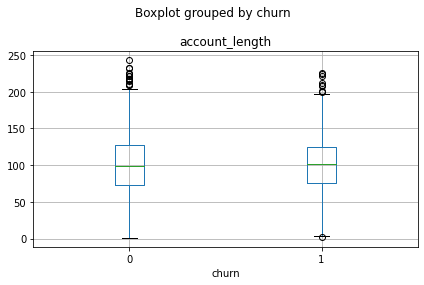

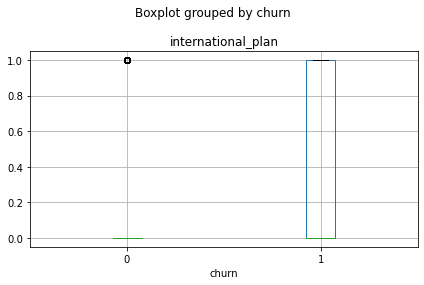

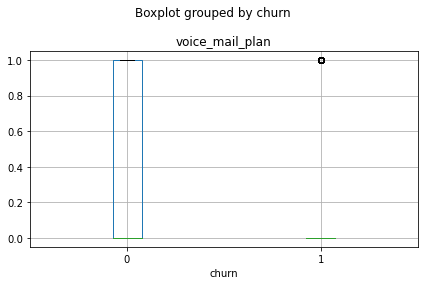

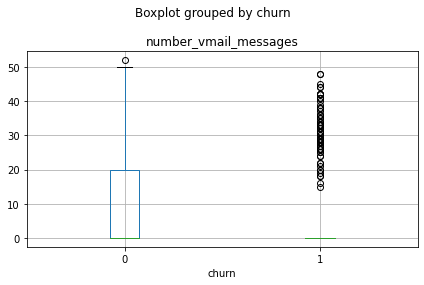

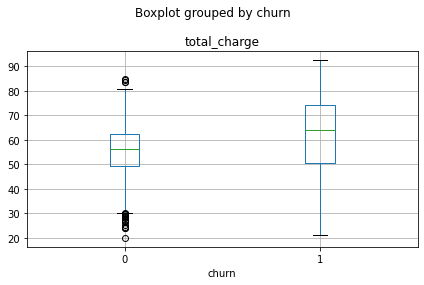

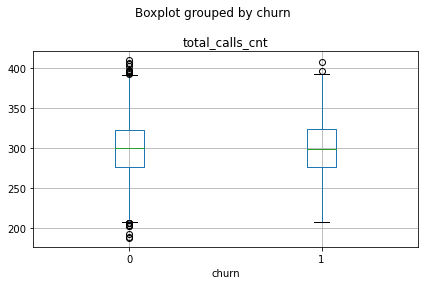

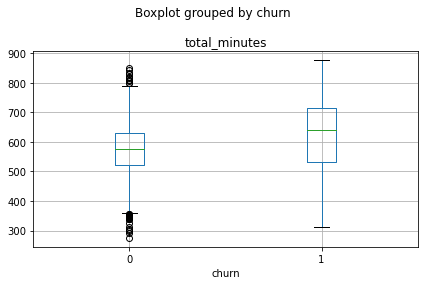

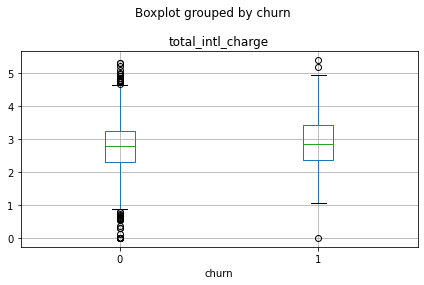

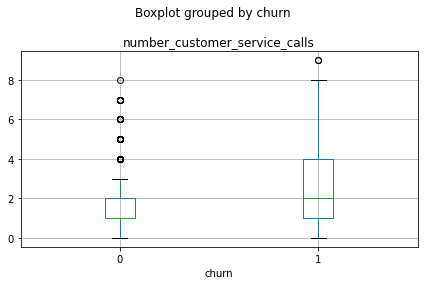

In [7]:
import matplotlib.pyplot as plt

for col in df.columns[:-1]:
    df.boxplot(column=col, by='churn')
    plt.tight_layout()
    plt.show()

Set input `X` and output `y`. Then, check the ratio of positive samples.

In [8]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.shape, y.shape, y.sum() / len(y)

((4250, 9), (4250,), 0.14070588235294118)

If we classify all samples to the negative class (`churn=no`), the accuracy will be 0.859.

Q. In this case, what is precision, recall, and f1 score?

Split data into training and test data sets.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

The `stratify` option enables the positive and negative samples to be equally partitioned into training and test data sets.

In [10]:
sum(y_train)/len(y_train), sum(y_test)/len(y_test)

(0.14058823529411765, 0.1411764705882353)

# 1. Decision Tree

Use `DecisionTreeClassifier` from `sklearn` package (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).

In [11]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(max_depth=3) # define a model
clf_dt.fit(X_train, y_train) # train a model

y_test_pred = clf_dt.predict(X_test) # assume cutoff=0.5

Evaluate model using several metrics. Functions available by `sklearn.metrics` (https://scikit-learn.org/stable/modules/model_evaluation.html)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    fscore = f1_score(y_true, y_pred)
    print('Accuracy: {:.2f}%'.format(accuracy*100))
    print('Precision: {:.2f}%'.format(precision*100))
    print('Recall: {:.2f}%'.format(recall*100))
    print('Fscore: {:.2f}%'.format(fscore*100))

print('Evaluation on Test Set:')
evaluate(y_test, y_test_pred)

Evaluation on Test Set:
Accuracy: 94.00%
Precision: 97.26%
Recall: 59.17%
Fscore: 73.58%


Visualize the tree

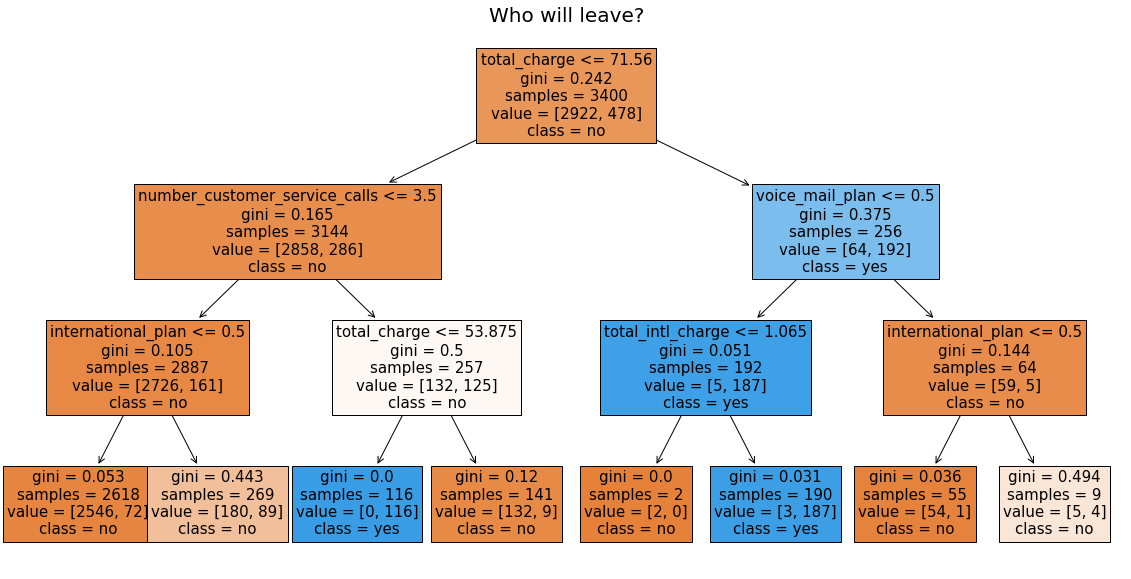

In [13]:
from sklearn.tree import plot_tree

fig, axes = plt.subplots(figsize=(20, 10))
plot_tree(clf_dt, feature_names=X.columns, class_names=['no', 'yes'], filled=True, fontsize=15)
plt.title('Who will leave?', fontsize=20)
# plt.tight_layout()
plt.show()

# 2. Naive Bayes

https://scikit-learn.org/stable/modules/naive_bayes.html

In [14]:
from sklearn.naive_bayes import GaussianNB

clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

y_test_pred = clf_nb.predict(X_test)

In [15]:
print('Evaluation on Test Set:')
evaluate(y_test, y_test_pred)

Evaluation on Test Set:
Accuracy: 88.35%
Precision: 59.63%
Recall: 54.17%
Fscore: 56.77%


# 3. k-Nearest Neighbor

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [16]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)

y_test_pred = clf_knn.predict(X_test)

In [17]:
print('Evaluation on Test Set:')
evaluate(y_test, y_test_pred)

Evaluation on Test Set:
Accuracy: 88.00%
Precision: 68.75%
Recall: 27.50%
Fscore: 39.29%


# 4. Support Vector Machine

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [18]:
from sklearn.svm import SVC

clf_svm = SVC(C=1000)
clf_svm.fit(X_train, y_train)

y_test_pred = clf_svm.predict(X_test)

In [19]:
print('Evaluation on Test Set:')
evaluate(y_test, y_test_pred)

Evaluation on Test Set:
Accuracy: 89.88%
Precision: 100.00%
Recall: 28.33%
Fscore: 44.16%


# 5. Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [20]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

y_test_pred = clf_lr.predict(X_test)

/home/gugu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
print('Evaluation on Test Set:')
evaluate(y_test, y_test_pred)

Evaluation on Test Set:
Accuracy: 85.88%
Precision: 50.00%
Recall: 13.33%
Fscore: 21.05%


Check model coefficients.

In [22]:
clf_lr.coef_, clf_lr.intercept_

(array([[-0.00261059,  1.99117158, -0.19175112, -0.02338334,  0.08231984,
         -0.01325637, -0.00536889,  0.07645692,  0.50809369]]),
 array([-0.48481043]))

In [23]:
clf_lr.feature_names_in_

array(['account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_charge', 'total_calls_cnt',
       'total_minutes', 'total_intl_charge',
       'number_customer_service_calls'], dtype=object)

In [24]:
for name, coeff in zip(clf_lr.feature_names_in_, clf_lr.coef_.squeeze()):
    print('{:<30}: {}'.format(name, coeff))
print('{:<30}: {}'.format('intercept', clf_lr.intercept_.squeeze()))

account_length                : -0.0026105886885110486
international_plan            : 1.9911715798303475
voice_mail_plan               : -0.191751124321892
number_vmail_messages         : -0.023383335807831532
total_charge                  : 0.08231984305269816
total_calls_cnt               : -0.013256369442648016
total_minutes                 : -0.005368888470055275
total_intl_charge             : 0.07645692094475673
number_customer_service_calls : 0.5080936941106226
intercept                     : -0.4848104296217363


# 6. Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [25]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

y_test_pred = clf_rf.predict(X_test)

In [26]:
print('Evaluation on Test Set:')
evaluate(y_test, y_test_pred)

Evaluation on Test Set:
Accuracy: 95.41%
Precision: 95.51%
Recall: 70.83%
Fscore: 81.34%


Random forest provides a powerful information: feature importance.

We can check feature importance scores of the model.

In [27]:
clf_rf.feature_importances_

array([0.05402228, 0.06994235, 0.04215902, 0.05227604, 0.34788963,
       0.05229292, 0.13461762, 0.09317764, 0.15362251])

Let's print feature names as well.

In [28]:
for name, fi in zip(X_train.columns, clf_rf.feature_importances_):
    print('{:<30}: {}'.format(name, fi))

account_length                : 0.05402228242688283
international_plan            : 0.0699423523235589
voice_mail_plan               : 0.04215901576223377
number_vmail_messages         : 0.05227603524594089
total_charge                  : 0.34788963121494504
total_calls_cnt               : 0.0522929155585552
total_minutes                 : 0.13461761537733077
total_intl_charge             : 0.09317764231548394
number_customer_service_calls : 0.1536225097750687


How about sort the feature importance scores?

In [29]:
import numpy as np

indices = np.argsort(clf_rf.feature_importances_)
for i in indices:
    print('{:<30}: {}'.format(X_train.columns[i], clf_rf.feature_importances_[i]))

voice_mail_plan               : 0.04215901576223377
number_vmail_messages         : 0.05227603524594089
total_calls_cnt               : 0.0522929155585552
account_length                : 0.05402228242688283
international_plan            : 0.0699423523235589
total_intl_charge             : 0.09317764231548394
total_minutes                 : 0.13461761537733077
number_customer_service_calls : 0.1536225097750687
total_charge                  : 0.34788963121494504


# 7. ROC Curve

Draw roc curve to visualize trade-off between FPR and TPR. We can also calculate AUC scores.

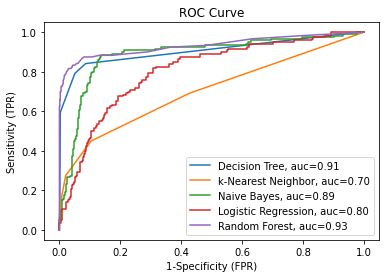

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

for clf, name in zip([clf_dt, clf_knn, clf_nb, clf_lr, clf_rf], 
                     ['Decision Tree', 'k-Nearest Neighbor', 'Naive Bayes', 'Logistic Regression', 'Random Forest']):
    y_test_pred_proba = clf.predict_proba(X_test)[:, 1] # probability score of positive class
    fpr, tpr, _ = roc_curve(y_test,  y_test_pred_proba) # get fpr and tpr arrays
    auc = roc_auc_score(y_test, y_test_pred_proba) # get auc
    plt.plot(fpr, tpr, label="{}, auc={:.2f}".format(name, auc))

plt.legend(loc=4)
plt.xlabel('1-Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.title('ROC Curve')
plt.show()

Q. Why isn't SVM included in the ROC curve visualization?

# 7. Data normalization

Does the model performance affected by normalization?

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [32]:
clf_dt = DecisionTreeClassifier(max_depth=3) # define a model
clf_dt.fit(X_train_norm, y_train) # train a model

clf_nb = GaussianNB()
clf_nb.fit(X_train_norm, y_train)

clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train_norm, y_train)

clf_svm = SVC(C=1000)
clf_svm.fit(X_train_norm, y_train)

clf_lr = LogisticRegression()
clf_lr.fit(X_train_norm, y_train)

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train_norm, y_train)
print('trainining finished.')

RandomForestClassifier()

Draw roc curve to visualize trade-off between FPR and TPR. We can also calculate AUC scores.

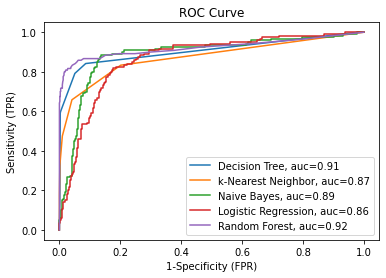

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

for clf, name in zip([clf_dt, clf_knn, clf_nb, clf_lr, clf_rf], 
                     ['Decision Tree', 'k-Nearest Neighbor', 'Naive Bayes', 'Logistic Regression', 'Random Forest']):
    y_test_pred_proba = clf.predict_proba(X_test_norm)[:, 1] # probability score of positive class
    fpr, tpr, _ = roc_curve(y_test,  y_test_pred_proba) # get fpr and tpr arrays
    auc = roc_auc_score(y_test, y_test_pred_proba) # get auc
    plt.plot(fpr, tpr, label="{}, auc={:.2f}".format(name, auc))

plt.legend(loc=4)
plt.xlabel('1-Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.title('ROC Curve')
plt.show()

Compare the performance before and after normalizing feature scales!